202055148정혜린&202055149조다영

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

plt.rc('font', family='Malgun Gothic')

## 나이대 별 평균 수면시간

In [2]:
##2016-2018 데이터
d16 = pd.read_csv('hn16_all.csv',encoding='cp949')
d17 = pd.read_csv('hn17_all.csv',encoding='cp949')
d18 = pd.read_csv('hn18_all.csv',encoding='cp949')

alld = [d16, d17, d18]
d = pd.concat(alld)

C:\Users\COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (455,461,586,643,678) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (119,158,507,639,659) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (146,436,555,570,572,587) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data = d[['age','Total_slp_wk','Total_slp_wd']]
ul1 = data[data['Total_slp_wk']>1440].index
dr1 = data.drop(ul1) 
ul2 = dr1[dr1['Total_slp_wd']>1440].index
drr1 = dr1.drop(ul2)
da1 = drr1.dropna()
da1['slp_avg']=(da1['Total_slp_wk']+da1['Total_slp_wd'])/2/60
da1

<ipython-input-3-c13cf000e2fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da1['slp_avg']=(da1['Total_slp_wk']+da1['Total_slp_wd'])/2/60


,age,Total_slp_wk,Total_slp_wd,slp_avg
0,61,480.0,480.0,8.00
1,57,420.0,540.0,8.00
2,41,420.0,420.0,7.00
3,39,360.0,420.0,6.50
7,44,300.0,480.0,6.50
...,...,...,...,...
7975,50,360.0,660.0,8.50
7978,42,420.0,510.0,7.75
7981,41,510.0,570.0,9.00
7982,35,510.0,510.0,8.50


In [4]:
#2019 데이터
d19 = pd.read_csv('hn19_all.csv', encoding='cp949')
d19.rename(columns={'BP16_1':'Total_slp_wk', 'BP16_2':'Total_slp_wd'}, inplace=True)
d9 = d19[['age','Total_slp_wk','Total_slp_wd']]
ul3 = d9[d9['Total_slp_wk']>24].index
dr2 = d9.drop(ul3) 
ul4 = dr2[dr2['Total_slp_wd']>24].index
drr2 = dr2.drop(ul4)
da2 = drr2.dropna()
da2['slp_avg']=(da2['Total_slp_wk']+da2['Total_slp_wd'])/2
da2

C:\Users\COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (107,380,399,505,514,517,530,541) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-4-a75416bb3d2d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da2['slp_avg']=(da2['Total_slp_wk']+da2['Total_slp_wd'])/2


,age,Total_slp_wk,Total_slp_wd,slp_avg
0,61,4.0,4.0,4.0
1,28,9.0,12.0,10.5
2,53,8.0,8.0,8.0
3,50,7.0,8.0,7.5
5,71,8.0,8.0,8.0
...,...,...,...,...
8104,62,5.0,5.0,5.0
8105,48,8.0,8.0,8.0
8106,47,7.0,7.0,7.0
8107,43,8.0,8.0,8.0


In [5]:
#2016-2019 데이터
df = pd.concat([da1, da2])
df

,age,Total_slp_wk,Total_slp_wd,slp_avg
0,61,480.0,480.0,8.0
1,57,420.0,540.0,8.0
2,41,420.0,420.0,7.0
3,39,360.0,420.0,6.5
7,44,300.0,480.0,6.5
...,...,...,...,...
8104,62,5.0,5.0,5.0
8105,48,8.0,8.0,8.0
8106,47,7.0,7.0,7.0
8107,43,8.0,8.0,8.0


[평균 수면시간 비율]

In [6]:
#권장수면시간 : 7-8시간 30분
#적게:7시간 미만
#많게:8시간 30분 초과

condition_list = [(df.slp_avg < 7), 
                  (df.slp_avg <= 8.5) & (df.slp_avg >= 7), 
                  (df.slp_avg > 8.5) ]
choice_list = [ 'Too little', 'Great', 'Too much' ]
df['slp'] = np.select(condition_list, choice_list, default = 'NaN')
df

,age,Total_slp_wk,Total_slp_wd,slp_avg,slp
0,61,480.0,480.0,8.0,Great
1,57,420.0,540.0,8.0,Great
2,41,420.0,420.0,7.0,Great
3,39,360.0,420.0,6.5,Too little
7,44,300.0,480.0,6.5,Too little
...,...,...,...,...,...
8104,62,5.0,5.0,5.0,Too little
8105,48,8.0,8.0,8.0,Great
8106,47,7.0,7.0,7.0,Great
8107,43,8.0,8.0,8.0,Great


Text(0.5, 1.0, '[평균 수면시간 비율(%)]')

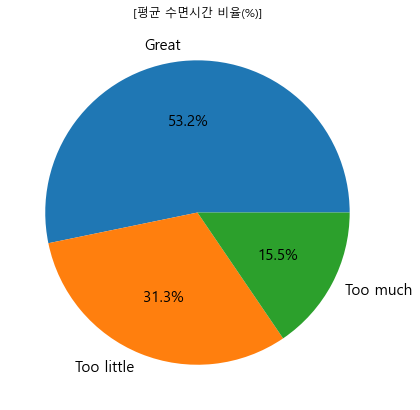

In [7]:
size=[len(df[df.slp=='Great']),len(df[df.slp=='Too little']),len(df[df.slp=='Too much'])]
labels=['Great','Too little','Too much']

plt.figure(figsize=(7,7))
plt.pie(size, labels = labels, autopct = '%1.1f%%',textprops={'fontsize':15})
plt.title('[평균 수면시간 비율(%)]')

In [8]:
#나이대 지정
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
group_names = ['10대', '20대', '30대', '40대', '50대', '60대', '70대']
age_cut_data = pd.cut(df.age, age_bins, right = False, labels = group_names)
df['age_group'] = age_cut_data
df

,age,Total_slp_wk,Total_slp_wd,slp_avg,slp,age_group
0,61,480.0,480.0,8.0,Great,60대
1,57,420.0,540.0,8.0,Great,50대
2,41,420.0,420.0,7.0,Great,40대
3,39,360.0,420.0,6.5,Too little,30대
7,44,300.0,480.0,6.5,Too little,40대
...,...,...,...,...,...,...
8104,62,5.0,5.0,5.0,Too little,60대
8105,48,8.0,8.0,8.0,Great,40대
8106,47,7.0,7.0,7.0,Great,40대
8107,43,8.0,8.0,8.0,Great,40대


Text(0.5, 1.0, '나이대 별 수면시간')

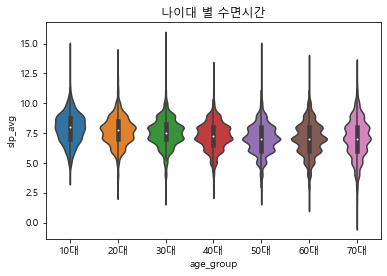

In [9]:
sns.violinplot(x="age_group", y="slp_avg", data=df, 
              order=['10대', '20대', '30대', '40대', '50대', '60대', '70대'])
plt.title('나이대 별 수면시간')


In [10]:
df.corrwith(df.slp_avg)

age            -0.188515
Total_slp_wk    0.318762
Total_slp_wd    0.336028
slp_avg         1.000000
dtype: float64

## 수면시간에 따른 건강상태

In [11]:
#2016-2018 데이터
hd = d[['BP1','BP5','DI1_pr','DI4_pr','DE1_pr','HE_BMI','Total_slp_wk','Total_slp_wd']]
hd

,BP1,BP5,DI1_pr,DI4_pr,DE1_pr,HE_BMI,Total_slp_wk,Total_slp_wd
0,4.0,8.0,1.0,8.0,1.0,24.574472,480.0,480.0
1,3.0,8.0,8.0,8.0,8.0,21.204099,420.0,540.0
2,3.0,8.0,8.0,8.0,8.0,23.613661,420.0,420.0
3,2.0,8.0,8.0,8.0,8.0,29.913951,360.0,420.0
4,2.0,8.0,8.0,8.0,8.0,21.265514,400.0,390.0
...,...,...,...,...,...,...,...,...
7987,3.0,8.0,1.0,8.0,8.0,24.569512,540.0,660.0
7988,2.0,8.0,1.0,8.0,8.0,26.904906,390.0,540.0
7989,3.0,8.0,8.0,NaN,8.0,22.367067,NaN,NaN
7990,8.0,8.0,8.0,8.0,8.0,17.655332,NaN,NaN


In [12]:
#2019 데이터
hd19 = pd.read_csv('hn19_all.csv', encoding='cp949')
hd9 = hd19[['BP1','BP5','DI1_pr','DI4_pr','DE1_pr','HE_BMI']]
hd9['Total_slp_wk']=hd19.BP16_1*60
hd9['Total_slp_wd']=hd19.BP16_2*60
hd9

## BP16_1 = 주중수면시간
## BP16_2 = 주말수면시간
## BP1 = 스트레스인지정도(1 많이느낌 ~~ 4 거의 안느낌, 8 해당x)
## BP5 = 2주이상 우울감을 느꼈는지(1 예, 2아니오, 8 해당x)
## DI1_pr = 고혈압 현재 유병여부(0 없음, 1 있음, 8 안함)
## DI4_pr = 심근경색증 혹은 협심증 현재 유병여부(0 없음, 1 있음, 8 안함)
## DE1_pr = 당뇨병 (0 없음, 1 있음, 8 안함)
## HE_BMI = 체질량지수

C:\Users\COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (107,380,399,505,514,517,530,541) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-12-e5f9b3303c7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd9['Total_slp_wk']=hd19.BP16_1*60
<ipython-input-12-e5f9b3303c7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd9['Total_slp_wd']=hd19.BP16_2*60


,BP1,BP5,DI1_pr,DI4_pr,DE1_pr,HE_BMI,Total_slp_wk,Total_slp_wd
0,3.0,1.0,1.0,8.0,8.0,25.987394,240.0,240.0
1,3.0,2.0,8.0,8.0,8.0,16.900942,540.0,720.0
2,3.0,2.0,8.0,8.0,8.0,19.781829,480.0,480.0
3,3.0,2.0,8.0,8.0,8.0,26.631647,420.0,480.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8105,4.0,2.0,8.0,8.0,8.0,20.535409,480.0,480.0
8106,3.0,2.0,8.0,8.0,8.0,22.400779,420.0,420.0
8107,3.0,2.0,8.0,8.0,8.0,15.375148,480.0,480.0
8108,1.0,1.0,8.0,8.0,8.0,14.844970,540.0,720.0


In [13]:
hdall = [hd, hd9]
hdf = pd.concat(hdall)

hdf['Total_slp']=(hdf.Total_slp_wk+hdf.Total_slp_wd)/2
hn8888=hdf[hdf['Total_slp']>=1440].index
hn1=hdf.drop(hn8888)
hn_orin=hn1.dropna()

hn_orin.rename(columns={'BP1':'스트레스','BP5':'우울감','DI1_pr':'고혈압','DI4_pr':'심근경색','DE1_pr':'당뇨병','HE_BMI':'BMI'}, inplace=True)

hn_orin

C:\Users\COM\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,스트레스,우울감,고혈압,심근경색,당뇨병,BMI,Total_slp_wk,Total_slp_wd,Total_slp
0,4.0,8.0,1.0,8.0,1.0,24.574472,480.0,480.0,480.0
1,3.0,8.0,8.0,8.0,8.0,21.204099,420.0,540.0,480.0
2,3.0,8.0,8.0,8.0,8.0,23.613661,420.0,420.0,420.0
3,2.0,8.0,8.0,8.0,8.0,29.913951,360.0,420.0,390.0
7,4.0,8.0,8.0,8.0,8.0,21.258364,300.0,480.0,390.0
...,...,...,...,...,...,...,...,...,...
8100,2.0,2.0,8.0,8.0,8.0,24.944507,420.0,480.0,450.0
8101,4.0,2.0,8.0,8.0,8.0,24.370606,420.0,420.0,420.0
8102,3.0,2.0,8.0,8.0,8.0,23.764537,420.0,480.0,450.0
8106,3.0,2.0,8.0,8.0,8.0,22.400779,420.0,420.0,420.0


In [14]:

condition_list = [(hn_orin.Total_slp < 420), 
                  (hn_orin.Total_slp <= 510) & (hn_orin.Total_slp >= 420), 
                  (hn_orin.Total_slp > 510) ]
choice_list = [ 'Too little', 'Great', 'Too much' ]
hn_orin['slp'] = np.select(condition_list, choice_list, default = 'NaN')
hn_orin

<ipython-input-14-9cb48e6cf07f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_orin['slp'] = np.select(condition_list, choice_list, default = 'NaN')


,스트레스,우울감,고혈압,심근경색,당뇨병,BMI,Total_slp_wk,Total_slp_wd,Total_slp,slp
0,4.0,8.0,1.0,8.0,1.0,24.574472,480.0,480.0,480.0,Great
1,3.0,8.0,8.0,8.0,8.0,21.204099,420.0,540.0,480.0,Great
2,3.0,8.0,8.0,8.0,8.0,23.613661,420.0,420.0,420.0,Great
3,2.0,8.0,8.0,8.0,8.0,29.913951,360.0,420.0,390.0,Too little
7,4.0,8.0,8.0,8.0,8.0,21.258364,300.0,480.0,390.0,Too little
...,...,...,...,...,...,...,...,...,...,...
8100,2.0,2.0,8.0,8.0,8.0,24.944507,420.0,480.0,450.0,Great
8101,4.0,2.0,8.0,8.0,8.0,24.370606,420.0,420.0,420.0,Great
8102,3.0,2.0,8.0,8.0,8.0,23.764537,420.0,480.0,450.0,Great
8106,3.0,2.0,8.0,8.0,8.0,22.400779,420.0,420.0,420.0,Great


정신적 건강상태(스트레스, 우울감)

In [15]:
## 수면시간에 따른 스트레스 비율

d1= hn_orin[hn_orin.slp=='Too little']
d2= hn_orin[hn_orin.slp=='Great']
d3= hn_orin[hn_orin.slp=='Too much']
a1=[]
a2=[]
a3=[]

for i in range(1,5):
    a1.append(len(d1[d1.스트레스==i])/len(d1)*100)
    a2.append(len(d2[d2.스트레스==i])/len(d2)*100)
    a3.append(len(d3[d3.스트레스==i])/len(d3)*100)


df=[a1,a2,a3]
st=pd.DataFrame(df,index=['Too little','Great','Too much'],
               columns=['st매우많음','st많음','st적음','st매우적음'])
st

,st매우많음,st많음,st적음,st매우적음
Too little,5.891980,23.549736,54.846336,15.457356
Great,3.861574,21.597383,58.366744,15.963283
Too much,4.590423,20.577760,53.700040,20.736051


In [16]:
# + 수면시간에 따른 우울감 비율

data=[len(d1[d1.우울감==1])/len(d1)*100,
len(d2[d2.우울감==1])/len(d2)*100,
len(d3[d3.우울감==1])/len(d3)*100]
dp = pd.DataFrame(data,index=['Too little','Great','Too much'],columns=['dp_YES'])

# 수면시간에 따른 정신적 건강 비율 df
mt = pd.concat([st,dp],axis=1)
mt

,st매우많음,st많음,st적음,st매우적음,dp_YES
Too little,5.891980,23.549736,54.846336,15.457356,7.219494
Great,3.861574,21.597383,58.366744,15.963283,5.180418
Too much,4.590423,20.577760,53.700040,20.736051,6.885635


In [17]:
#백분율

h1=[]
h2=[]
h3=[]
h4=[]
h5=[]

for i in range(0,3):
    h1.append((mt.st매우많음[i]*100)/mt.st매우많음.sum())
    h2.append((mt.st많음[i]*100)/mt.st많음.sum())
    h3.append((mt.st적음[i]*100)/mt.st적음.sum())
    h4.append((mt.st매우적음[i]*100)/mt.st매우적음.sum())
    h5.append((mt.dp_YES[i]*100)/mt.dp_YES.sum())

ha=[h1,h2,h3,h4,h5]
pr=pd.DataFrame(ha,columns=['Too little','Great','Too much'],
               index=['st매우많음','st많음','st적음','st매우적음','dp_YES'])
pr

,Too little,Great,Too much
st매우많음,41.076334,26.921222,32.002443
st많음,35.830779,32.860286,31.308935
st적음,32.859212,34.968338,32.172450
st매우적음,29.636382,30.606397,39.757221
dp_YES,37.434740,26.861658,35.703602


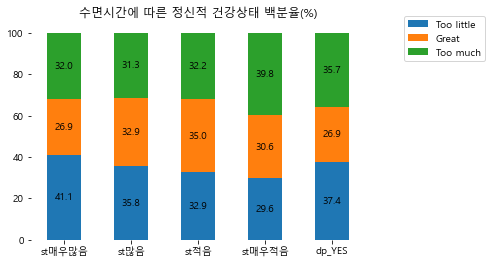

In [18]:
ax = pr.plot(kind='bar', stacked=True, title="수면시간에 따른 정신적 건강상태 백분율(%)", rot=0)
ax.legend(bbox_to_anchor=(1.1, 1.05))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.sca(ax)
plt.box(False)
plt.show()

신체적 건강상태(비만,당뇨병, 고혈압, 심근경색)

In [19]:
obesity_bins=[0,18.5,25,60]
group_names=['저체중','정상','비만']
obesity_data =pd.cut(hn_orin.BMI,obesity_bins,labels=group_names,right=False)

hn_orin['obesity']=obesity_data
hn_orin

<ipython-input-19-b47e793b2818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_orin['obesity']=obesity_data


,스트레스,우울감,고혈압,심근경색,당뇨병,BMI,Total_slp_wk,Total_slp_wd,Total_slp,slp,obesity
0,4.0,8.0,1.0,8.0,1.0,24.574472,480.0,480.0,480.0,Great,정상
1,3.0,8.0,8.0,8.0,8.0,21.204099,420.0,540.0,480.0,Great,정상
2,3.0,8.0,8.0,8.0,8.0,23.613661,420.0,420.0,420.0,Great,정상
3,2.0,8.0,8.0,8.0,8.0,29.913951,360.0,420.0,390.0,Too little,비만
7,4.0,8.0,8.0,8.0,8.0,21.258364,300.0,480.0,390.0,Too little,정상
...,...,...,...,...,...,...,...,...,...,...,...
8100,2.0,2.0,8.0,8.0,8.0,24.944507,420.0,480.0,450.0,Great,정상
8101,4.0,2.0,8.0,8.0,8.0,24.370606,420.0,420.0,420.0,Great,정상
8102,3.0,2.0,8.0,8.0,8.0,23.764537,420.0,480.0,450.0,Great,정상
8106,3.0,2.0,8.0,8.0,8.0,22.400779,420.0,420.0,420.0,Great,정상


(200.000, 700.000)

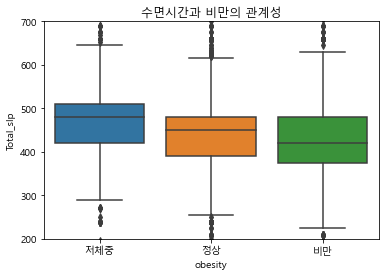

In [20]:
sns.boxplot(data=hn_orin, x='obesity',y='Total_slp')
plt.title('수면시간과 비만의 관계성')
plt.ylim(200,700)

In [21]:
#당뇨병x 수면시간
hn_dia0 = hn_orin[hn_orin.당뇨병==0]
size0=[len(hn_dia0[hn_dia0.slp=='Great']),
      len(hn_dia0[hn_dia0.slp=='Too little']),
      len(hn_dia0[hn_dia0.slp=='Too much'])]
labels0=['Great','Too little','Too much']
#당뇨병o 수면시간
hn_dia1 = hn_orin[hn_orin.당뇨병==1]
size1=[len(hn_dia1[hn_dia1.slp=='Great']),len(hn_dia1[hn_dia1.slp=='Too little']),len(hn_dia1[hn_dia1.slp=='Too much'])]
labels1=['Great','Too little','Too much']


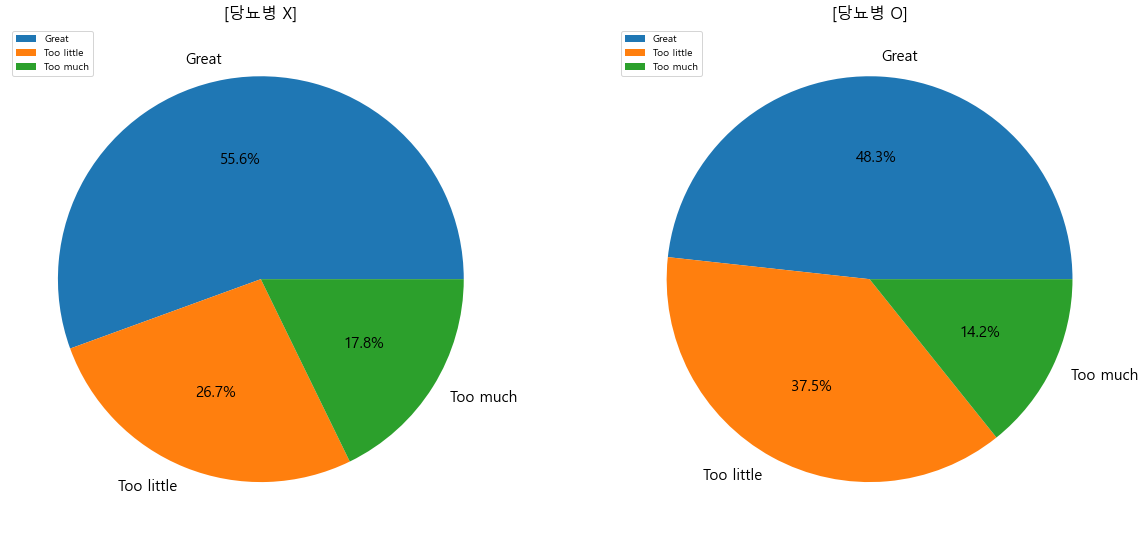

In [22]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)


ax1.pie(size0, labels = labels0, autopct = '%1.1f%%',textprops={'fontsize':15} )
ax2.pie(size1, labels = labels1, autopct = '%1.1f%%',textprops={'fontsize':15})

ax1.set_title('[당뇨병 X]',size=16)
ax1.legend(loc='upper left')
ax2.set_title('[당뇨병 O]',size=16)
ax2.legend(loc='upper left')

In [23]:
#고혈압X 수면시간
hn_hp0 = hn_orin[hn_orin.고혈압==0]
size2=[len(hn_hp0[hn_hp0.slp=='Great']),
      len(hn_hp0[hn_hp0.slp=='Too little']),
      len(hn_hp0[hn_hp0.slp=='Too much'])]
labels2=['Great','Too little','Too much']
#고혈압o 수면시간
hn_hp1 = hn_orin[hn_orin.고혈압==1]
size3=[len(hn_hp1[hn_hp1.slp=='Great']),len(hn_hp1[hn_hp1.slp=='Too little']),len(hn_hp1[hn_hp1.slp=='Too much'])]
labels3=['Great','Too little','Too much']


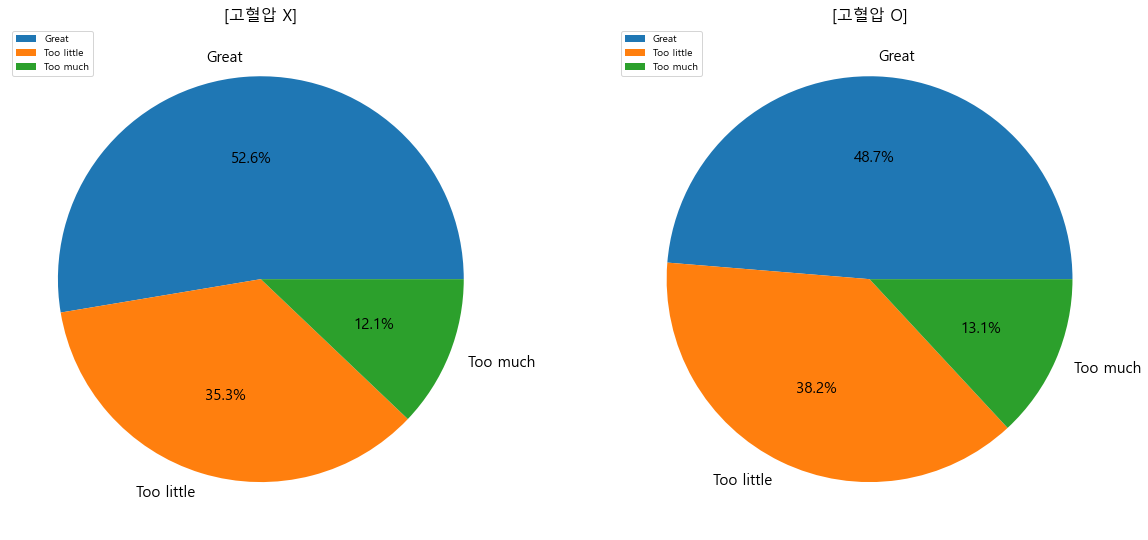

In [24]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)


ax1.pie(size2, labels = labels2, autopct = '%1.1f%%',textprops={'fontsize':15} )
ax2.pie(size3, labels = labels3, autopct = '%1.1f%%',textprops={'fontsize':15})

ax1.set_title('[고혈압 X]',size=16)
ax1.legend(loc='upper left')
ax2.set_title('[고혈압 O]',size=16)
ax2.legend(loc='upper left')

In [25]:
#심근경색X 수면시간
hn_bl0 = hn_orin[hn_orin.심근경색==0]
size4=[len(hn_bl0[hn_bl0.slp=='Great']),
      len(hn_bl0[hn_bl0.slp=='Too little']),
      len(hn_bl0[hn_bl0.slp=='Too much'])]
labels4=['Great','Too little','Too much']
#심근경색o 수면시간
hn_bl1 = hn_orin[hn_orin.심근경색==1]
size5=[len(hn_bl1[hn_bl1.slp=='Great']),len(hn_bl1[hn_bl1.slp=='Too little']),len(hn_bl1[hn_bl1.slp=='Too much'])]
labels5=['Great','Too little','Too much']


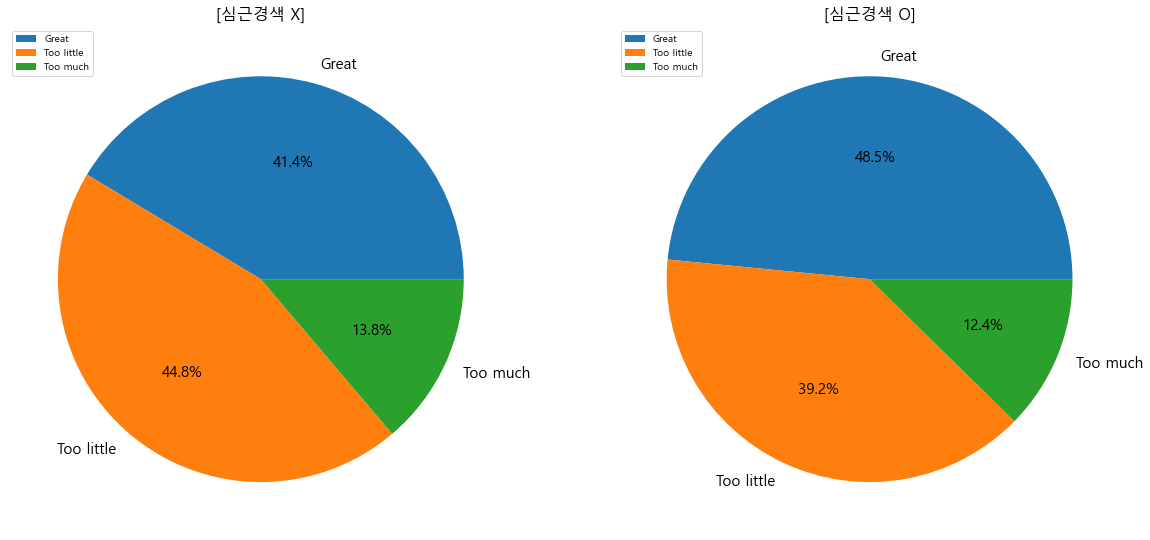

In [26]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)


ax1.pie(size4, labels = labels4, autopct = '%1.1f%%',textprops={'fontsize':15} )
ax2.pie(size5, labels = labels5, autopct = '%1.1f%%',textprops={'fontsize':15})

ax1.set_title('[심근경색 X]',size=16)
ax1.legend(loc='upper left')
ax2.set_title('[심근경색 O]',size=16)
ax2.legend(loc='upper left')